In [1]:
from tabula import read_pdf
import pandas as pd
from scipy.stats import spearmanr, pearsonr

In [2]:
# Smith et al. (2015)
pdf_path = 'sensors-15-19006.pdf'
output_csv_path = 'output_file.csv'
# Table 2 is on the 9th page (19014)
page_number = 9

# Try reading the PDF table(s)
try:
  tables = read_pdf(pdf_path, pages=page_number, multiple_tables=True)
  print(f"Tables extracted: {len(tables)}")
except Exception as e:
  print(f"Error reading PDF: {e}")
  tables = []

if not tables:
  print("No tables found.")
  exit()

# Process the first table
df = tables[0]
raw_movrates = df['Movement Rate *']

# Filter out rows that don't contain numbers
movrates = raw_movrates[raw_movrates.str.contains(r'\d', na=False)]

Tables extracted: 1


Table 2 is a *complex* table. See the green box at the bottom. That contains the column means and standard deviations. These should be excluded in calculating correlation coefficients. 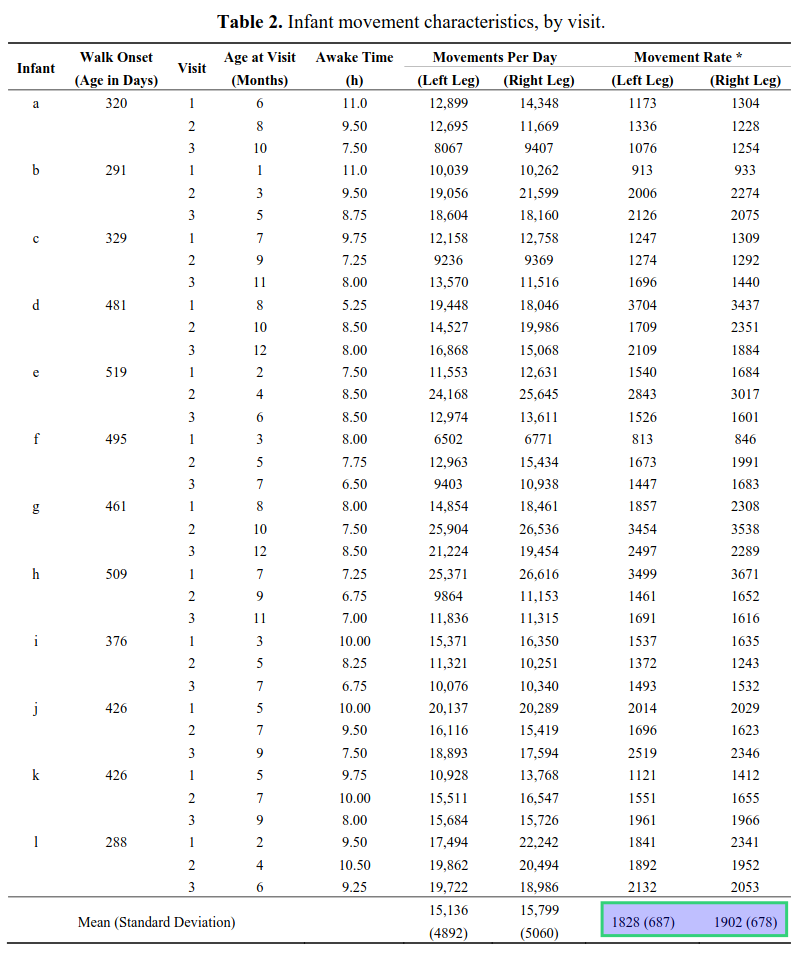

In [3]:
 # Remove the last row and split remaining rows into columns
movrates2 = movrates.iloc[:-1]
df2 = movrates2.str.split(expand=True)

# Convert to numeric, handling any errors as NaN
df2 = df2.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
df2 = df2.dropna()

# Add column names
df2.columns = ['lmovrates', 'rmovrates']

# Calculate the Spearman and Pearson correlation coefficients
rs, rs_p = spearmanr(df2['lmovrates'], df2['rmovrates'])
print(f'Spearman Rho: {rs}, p-value: {rs_p}')

rp, rp_p = pearsonr(df2['lmovrates'], df2['rmovrates'])
print(f'Pearson R: {rp}, p-value: {rp_p}')

# Export the cleaned data to CSV
df2.to_csv(output_csv_path, index=False)

Spearman Rho: 0.9045627150464127, p-value: 3.8517126368172185e-14
Pearson R: 0.9541193734116105, p-value: 2.2186650538231103e-19
